<a href="https://colab.research.google.com/github/sathasivamn/Project-586--Customer-Segmentation/blob/main/Project_Customer_Segmentation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-586- Customer Segmentation
# Title - Customer Personality Analysis
## Week -1 - Exploratory Data Analysis - EDA

# Goal:
# To perform EDA to understand customer behaviors, spending patterns, and lifestyle preferences, and prepare the dataset for clustering to summarize customer segments.

# Profile Report with pandas-profiling (Ydata-profiling)
## Generates a comprehensive HTML report of our dataset.
## Helps you understand the structure, quality, and distribution of our data in just one line of code.
## Saves hours of manual EDA — gives quick insights in minutes.
## Detects missing values, duplicates, inconsistent data.
## Quickly shows distributions and correlations.
## Helps identify which features need cleaning, encoding, or removal before clustering or ML

In [ ]:
#Profile Report (with Ydata-profiling)

# Import libraries
!pip install pandas_profiling==3.1.0
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=144fa91cba6f8837dbb2ea32f64fe9d96e654c6ba5c76073e17ffab32b1131c5
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-cp312-cp312-linux_x86_64.whl size=28152 sha256=611f1c48373b1c74b790c43cb49797f510c6edbe21a57313e04acf29fbf45546
  Stored

In [5]:
import pandas as pd
data=pd.read_excel("marketing_campaign.xlsx")

In [6]:
from pandas_profiling import ProfileReport
import ydata_profiling as pp

/tmp/ipython-input-1821674736.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [8]:
profile=ProfileReport(data, title="Exploratory Data Analysis")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 29/29 [00:00<00:00, 55.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 1: Importing Libraries & Loading Data

In [9]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering and preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Display settings
pd.set_option('display.max_columns', None)

In [11]:
# Loading Data
df = pd.read_excel("marketing_campaign.xlsx")

In [12]:
# View dataset shape & top rows
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# 2: Data Exploration Technique
## Data types and basic metadata - identify which columns are numeric / categorical / datetime and where missing data is concentrated.

In [50]:
# Basic info
df.info()

# Descriptive statistics
df.describe()

# Check data types
print("Columns and dtypes:\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

# 3: Checking Missing Values and Data Types
## Identifies columns with missing data and This helps in deciding how to treat them (imputation or removal).

In [56]:
# Check for missing values
missing = data.isnull().sum()
print("Missing values:\n", missing)

# Percentage of missing values
missing_percent = (missing / len(df)) * 100
missing_percent[missing_percent > 0]

Missing values:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


,0
Income,1.083032


# 4: Data Cleaning
## We remove null income values.
## Dt_Customer is converted to proper date format.
## A new column Customer_For measures how long a customer has been with the company.

In [57]:
# Data Cleaning - Cleaning ensures clustering isn’t skewed by blanks or wrong types.

# Drop rows where Income is missing (if small in number)
df = data.dropna(subset=['Income'])

# Remove duplicates
df = data.drop_duplicates()

# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Create new feature: Customer tenure
df['Customer_For'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# 5: Summary statistics
## Numeric summary shows spread, central tendency, possible outliers.
## Categorical counts show dominant categories and sparse levels.

In [47]:
# Summary Statistics
num_summary = df.select_dtypes(include=[np.number]).describe().T
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric summary (top rows):\n", num_summary.head())
print("\nCategorical columns:", cat_cols)
for c in cat_cols[:8]:
    print(f"\nValue counts for {c} (top 10):\n", df[c].value_counts(dropna=False).head(10))

Numeric summary (top rows):
              count          mean           std     min       25%      50%  \
ID          2216.0   5588.353339   3249.376275     0.0   2814.75   5458.5   
Year_Birth  2216.0   1968.820397     11.985554  1893.0   1959.00   1970.0   
Income      2216.0  52247.251354  25173.076661  1730.0  35303.00  51381.5   
Kidhome     2216.0      0.441787      0.536896     0.0      0.00      0.0   
Teenhome    2216.0      0.505415      0.544181     0.0      0.00      0.0   

                 75%       max  
ID           8421.75   11191.0  
Year_Birth   1977.00    1996.0  
Income      68522.00  666666.0  
Kidhome         1.00       2.0  
Teenhome        1.00       2.0  

Categorical columns: ['Education', 'Marital_Status']

Value counts for Education (top 10):
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Value counts for Marital_Status (top 10):
 Marital_Status
Married     857
Together   

# 6: Feature Engineering
## Combines child columns to Total_Kids.
## Creates TotalSpend for overall purchase spending.
## Calculates Age for demographic analysis.

In [60]:
# Total kids in household
df['Total_Kids'] = df['Kidhome'] + df['Teenhome']

# Total spending in 2 years
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Age of customers
df['Age'] = 2025 - df['Year_Birth']

# Drop unnecessary columns
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'], errors='ignore')

# 7: Data Visualization - See variable spread and detect skew/outliers.
# 7.1: Univariate analysis
### Numerical Features
#### Helps visualize income distribution, identify skewness and outliers.


Column: ID


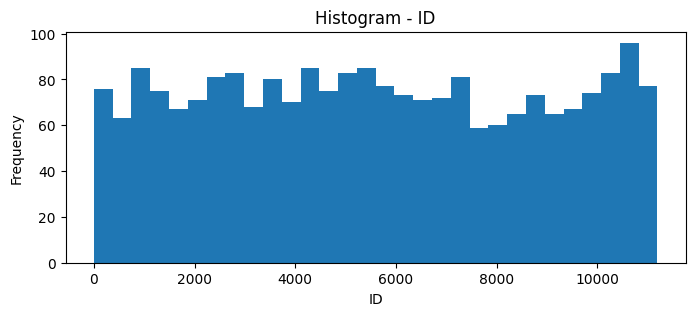

Column: Year_Birth


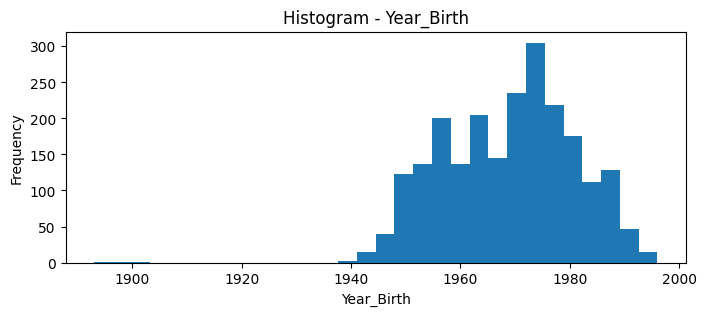

Column: Income


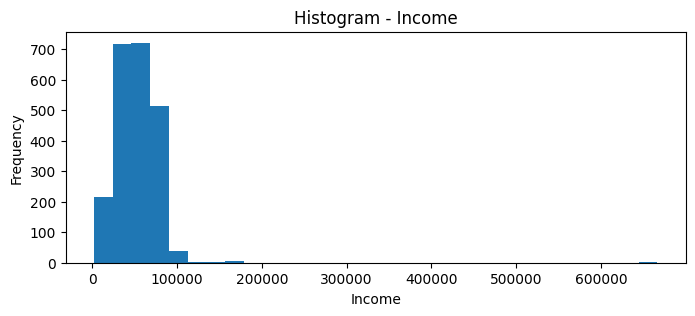

Column: Kidhome


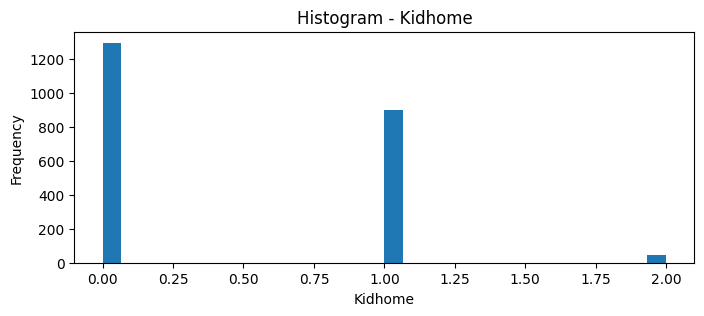

Column: Teenhome


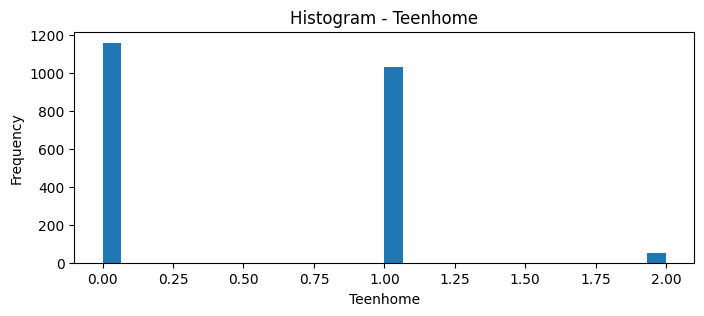

Column: Recency


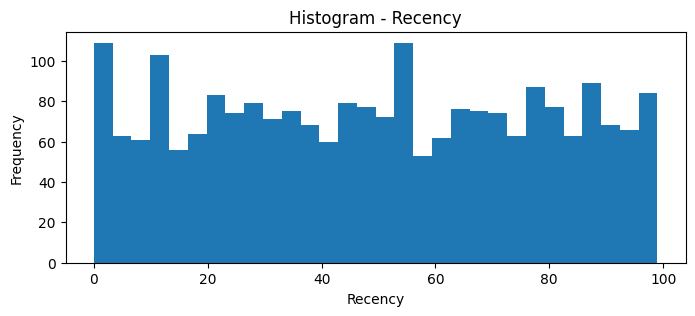

In [65]:
# Univariate analysis — (Single Variable Analysis)
# Histogram for numerical features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sample_cols = num_cols[:6]  # picking first 6 numeric cols or choosing those meaningful for segmentation
for c in sample_cols:
    print("Column:", c)
    plt.figure(figsize=(8,3))
    plt.title(f"Histogram - {c}")
    plt.hist(df[c].dropna(), bins=30)
    plt.xlabel(c); plt.ylabel("Frequency")
    plt.show()

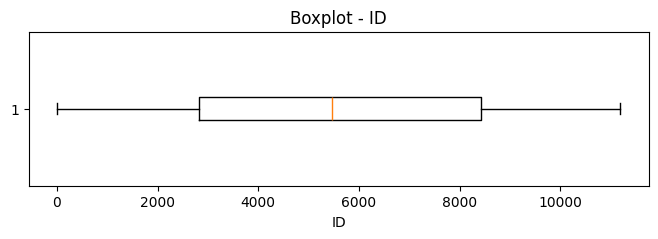

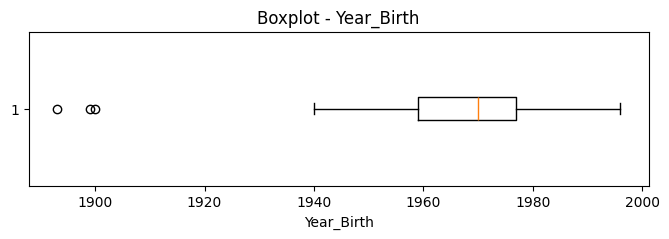

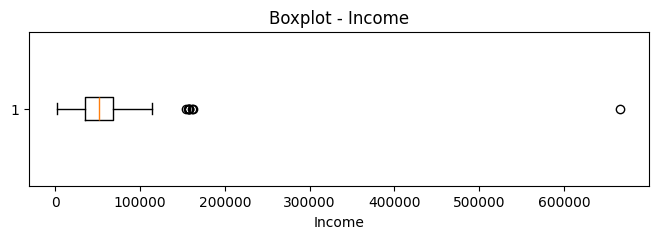

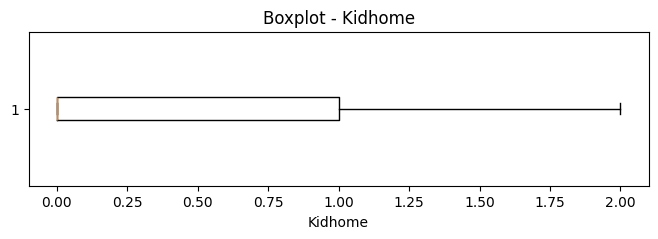

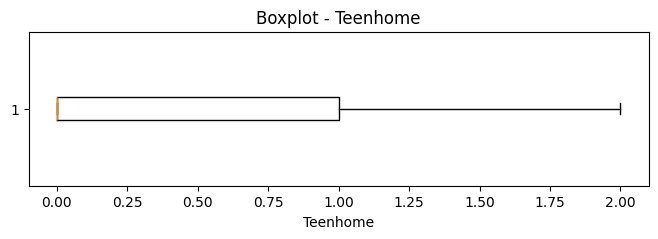

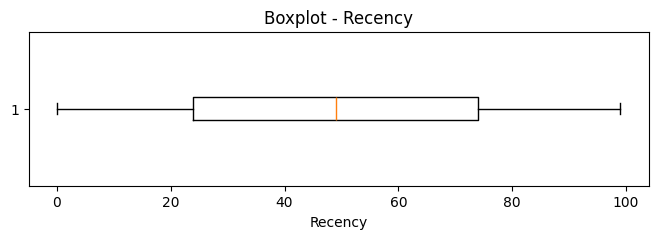

In [66]:
# Boxplots for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sample_cols = num_cols[:6]  # picking first 6 numeric cols or choosing those meaningful for segmentation
for c in sample_cols:
  plt.figure(figsize=(8,2))
  plt.title(f"Boxplot - {c}")
  plt.boxplot(df[c].dropna(), vert=False)
  plt.xlabel(c)
  plt.show()

# 7.2: Bivariate Analysis
## Scatterplot reveals how spending correlates with income.
## Barplot highlights which education group spends more.

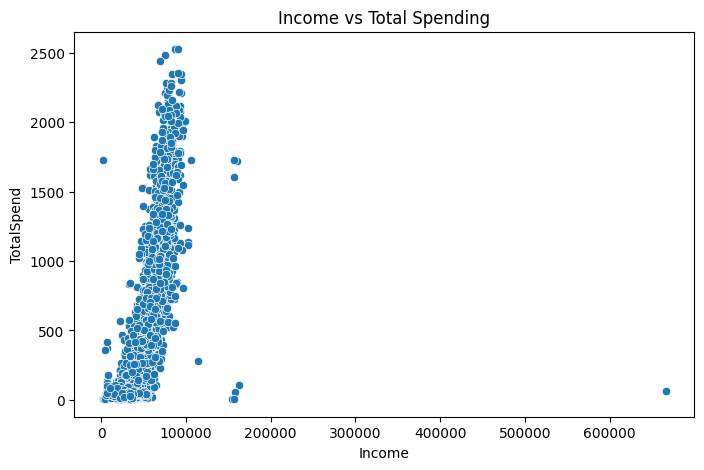

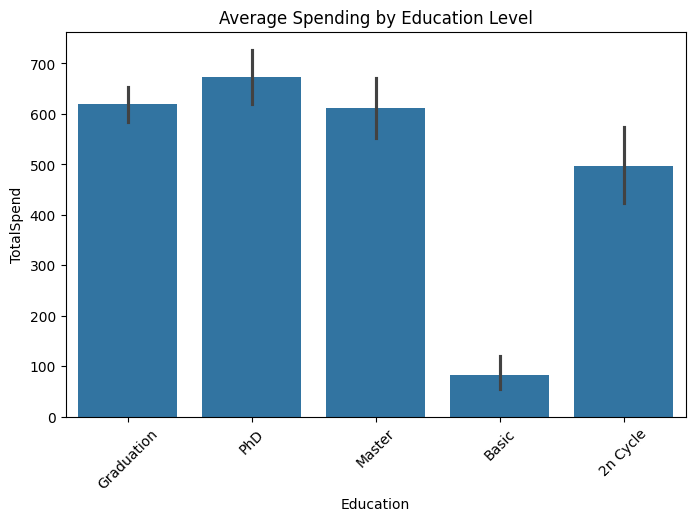

In [82]:
# Relationship between income and total spend
plt.figure(figsize=(8,5))
sns.scatterplot(x='Income', y='TotalSpend', data=df)
plt.title('Income vs Total Spending')
plt.show()

# Average spending by education
plt.figure(figsize=(8,5))
sns.barplot(x='Education', y='TotalSpend', data=df, estimator=np.mean)
plt.title('Average Spending by Education Level')
plt.xticks(rotation=45)
plt.show()

In [70]:
#Bivariate analysis — numeric vs numeric (scatter / correlation)
#pairwise and correlation
corr = df.select_dtypes(include=[np.number]).corr()
corr.round(3).head(20)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Total_Kids,TotalSpend,Age
ID,1.000,0.000,0.013,0.002,-0.003,-0.047,-0.023,0.005,-0.004,-0.024,-0.008,-0.013,-0.037,-0.019,-0.003,-0.015,-0.007,-0.036,-0.025,-0.008,-0.022,-0.015,0.034,-0.022,-0.000,-0.000,-0.018,-0.000
Year_Birth,0.000,1.000,-0.162,0.230,-0.352,-0.020,-0.158,-0.018,-0.031,-0.042,-0.018,-0.062,-0.061,-0.145,-0.121,-0.128,0.121,0.062,-0.061,0.007,-0.006,-0.007,-0.030,0.021,0.022,-0.090,-0.111,-1.000
Income,0.013,-0.162,1.000,-0.429,0.019,-0.004,0.579,0.431,0.585,0.439,0.441,0.326,-0.083,0.388,0.589,0.529,-0.553,-0.016,0.184,0.336,0.277,0.088,-0.027,0.133,-0.019,-0.293,0.668,0.162
Kidhome,0.002,0.230,-0.429,1.000,-0.036,0.009,-0.496,-0.373,-0.437,-0.388,-0.371,-0.350,0.222,-0.362,-0.502,-0.500,0.448,0.015,-0.162,-0.206,-0.172,-0.082,0.040,-0.080,-0.053,0.690,-0.557,-0.230
Teenhome,-0.003,-0.352,0.019,-0.036,1.000,0.016,0.005,-0.177,-0.261,-0.204,-0.162,-0.022,0.388,0.155,-0.111,0.051,0.135,-0.043,0.039,-0.191,-0.140,-0.016,0.003,-0.154,0.017,0.698,-0.138,0.352
Recency,-0.047,-0.020,-0.004,0.009,0.016,1.000,0.016,-0.004,0.023,0.001,0.023,0.017,-0.001,-0.011,0.025,0.001,-0.021,-0.033,0.019,0.000,-0.019,-0.002,0.013,-0.198,0.025,0.018,0.020,0.020
MntWines,-0.023,-0.158,0.579,-0.496,0.005,0.016,1.000,0.390,0.563,0.400,0.387,0.388,0.011,0.542,0.635,0.642,-0.321,0.062,0.373,0.473,0.354,0.206,-0.039,0.247,0.166,-0.352,0.892,0.158
MntFruits,0.005,-0.018,0.431,-0.373,-0.177,-0.004,0.390,1.000,0.543,0.595,0.567,0.393,-0.132,0.297,0.488,0.462,-0.418,0.015,0.010,0.216,0.195,-0.010,-0.005,0.125,0.067,-0.395,0.614,0.018
MntMeatProducts,-0.004,-0.031,0.585,-0.437,-0.261,0.023,0.563,0.543,1.000,0.568,0.524,0.351,-0.122,0.294,0.724,0.480,-0.539,0.018,0.103,0.374,0.310,0.043,-0.023,0.236,0.093,-0.502,0.843,0.031
MntFishProducts,-0.024,-0.042,0.439,-0.388,-0.204,0.001,0.400,0.595,0.568,1.000,0.580,0.423,-0.139,0.294,0.534,0.460,-0.446,0.000,0.017,0.200,0.261,0.003,-0.021,0.111,0.081,-0.426,0.643,0.042


## 7.3:  Categorical analysis
## Counts, proportions - see dominant customer attributes (education, marital status, etc) — helpful to profile clusters.


Education top categories:
 Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


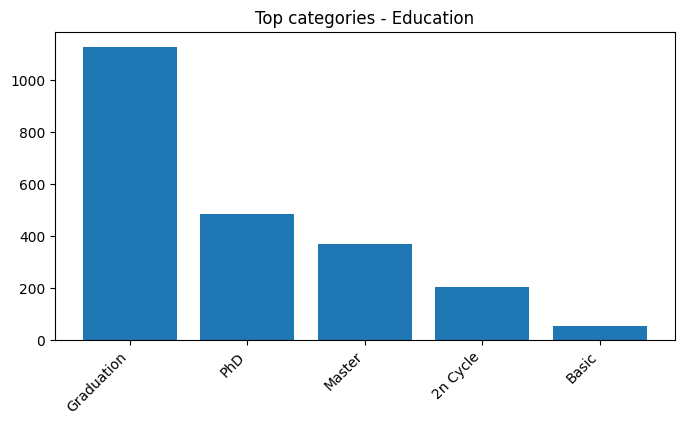


Marital_Status top categories:
 Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


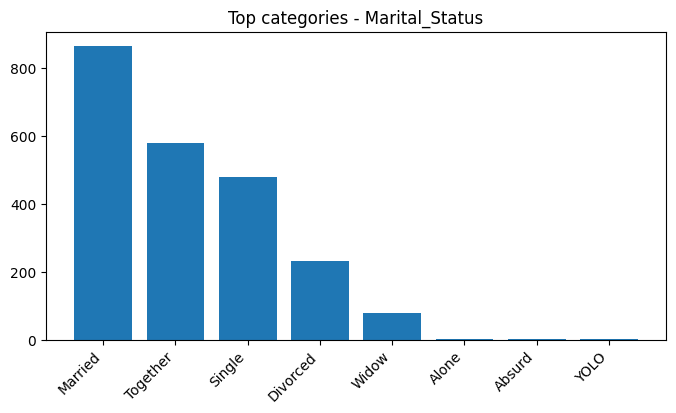

In [71]:
#categorical distributions for top categories
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
for c in cat_cols[:4]:
    vc = df[c].value_counts(dropna=False).head(20)
    print(f"\n{c} top categories:\n", vc)
    plt.figure(figsize=(8,4))
    plt.bar(range(len(vc)), vc.values)
    plt.xticks(range(len(vc)), vc.index, rotation=45, ha='right')
    plt.title(f"Top categories - {c}")
    plt.show()

# 8: Correlation Matrix & Heatmap
## Identifies highly correlated variables (useful for clustering feature selection).
## Values → +1 = strong positive, −1 = strong negative correlation
## Helps identify redundant variables before clustering.

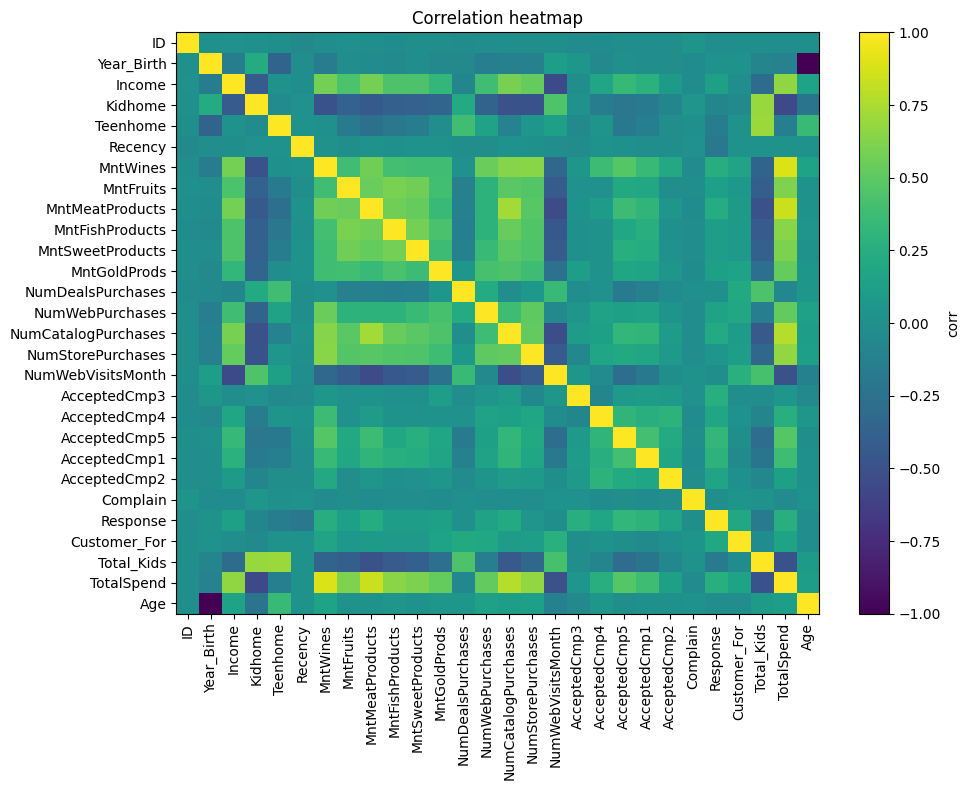

In [74]:
# Correlation Matrix & Heatmap
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
plt.title("Correlation heatmap")
plt.imshow(corr, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='corr')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

# 9: Time-Based Analysis
## Shows how long customers have been with the company — useful for loyalty insights.

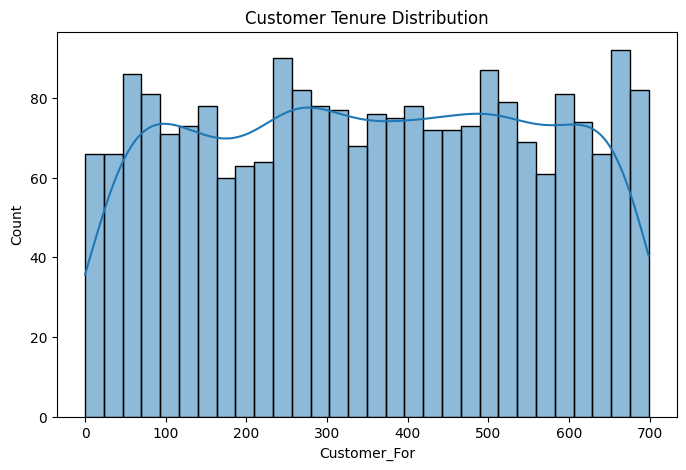

In [76]:
plt.figure(figsize=(8,5))
sns.histplot(df['Customer_For'], bins=30, kde=True)
plt.title('Customer Tenure Distribution')
plt.show()

# 10: Outlier Detection
## Detects extreme income values that might distort clustering.

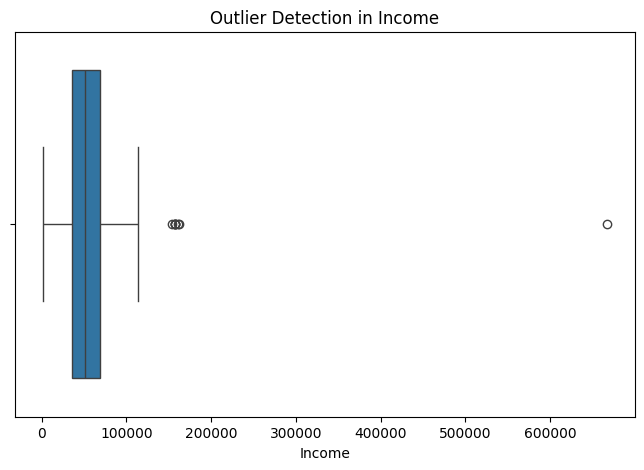

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Income'])
plt.title('Outlier Detection in Income')
plt.show()

# 11: Encoding Categorical Variables
## Converts categorical data into numeric form for clustering (machine learning models require numeric input).

In [78]:
# One-hot encoding for categorical variables
categorical = ['Education', 'Marital_Status']
data_encoded = pd.get_dummies(data, columns=categorical, drop_first=True)
data_encoded.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Kids,TotalSpend,Age,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1617,68,False,True,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,27,71,False,True,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,776,60,False,True,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,53,41,False,True,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,422,44,False,False,False,True,False,False,True,False,False,False,False


# 12: Feature Scaling (for clustering prep)
## Standardizes features to equal scale — essential for distance-based clustering algorithms like K-Means.

In [80]:
# Select relevant numeric columns for clustering
# Use the df DataFrame which contains the engineered features
features = ['Income', 'Recency', 'TotalSpend', 'Age', 'Customer_For', 'Total_Kids']

# One-hot encode categorical variables in df
categorical = ['Education', 'Marital_Status']
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

# Select the features for scaling from the encoded dataframe
features_for_scaling = df_encoded[features]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(features_for_scaling)

# Convert back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=features)
data_scaled.head()

,Income,Recency,TotalSpend,Age,Customer_For,Total_Kids
0,0.234063,0.307039,1.679417,0.985345,1.531185,-1.264505
1,-0.234559,-0.383664,-0.961275,1.235733,-1.190545,1.396361
2,0.769478,-0.798086,0.282673,0.317643,-0.205773,-1.264505
3,-1.017239,-0.798086,-0.918094,-1.268149,-1.061881,0.065928
4,0.240221,1.550305,-0.305254,-1.017761,-0.953012,0.065928


# EDA Summary (Insight and Description)

## Demographics - Most customers are married and middle-aged (40–60 years).
## Income	- Income is right-skewed, few high-income outliers exist.
## Spending Behavior - Wine and meat are top spending categories.
## Promotional Response -	Only a small portion of customers accept campaigns.
## Website vs Store - 	More purchases occur through stores than online.
## Correlation - Total spending highly correlated with income.
## Tenure	Majority - customers have been with the company for 4–6 years